In [93]:
import json
# 속성-값 쌍 또는 "키-값 쌍"으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷이다. 
# 비동기 브라우저/서버 통신 (AJAX)을 위해, 넓게는 XML(AJAX가 사용)을 대체하는 주요 데이터 포맷이다. 
# 특히, 인터넷에서 자료를 주고 받을 때 그 자료를 표현하는 방법으로 알려져 있다. 
# 자료의 종류에 큰 제한은 없으며, 특히 컴퓨터 프로그램의 변수값을 표현하는 데 적합하다.

path = 'C:/Users/user/Desktop/pydata-book-2nd-edition/pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'
# 해당 폴더가 있는 곳의 주소를 path 변수에 할당한다.

records = [json.loads(line) for line in open(path, encoding='utf8')]
# json 라이브러리의 loads 모듈을 이용하여 path 에 할당되어있는 폴더주소를 open 하고 
# 유니코드를 위한 가변 길이 문자 인코딩(멀티바이트) 방식 중 하나로 
# 티바이트 개념을 사용하여 하나의 Character Set에 거의 모든 문자를 넣을 수 있는
# utf8 로 인코딩한 값을 records 에 할당한다.

In [173]:
records[0] 
# recourds 의 0 인덱스에 할당되어 있는 값을 불러온다.
# 원본 파일에 가보면 {} 로 이루어져 있는 것을 확인할 수 있으니 key 와 value 값으로 이루어져 있다는 것을 알 수 있다.

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [95]:
time_zones =[rec['tz'] for rec in records]
# 위 결과값을 보고 time_zones 이라는 변수를 만들어 records 에 할당되어 있는 값들 중, 'tz' element 만
# 빼내어 표준시간대 필드를 전부 가져오려고 시도했지만, records 에 있는 아이템들이 전부 
# 표준 시간대를 갖고 있지는 않다는 것을 알 수 있다.
# for 루프를 사용해서 rec 을 records 에서 나오는 아이템을 받는 인자로 만들었다는 것을 알 수 있다.

KeyError: 'tz'

In [96]:
time_zones =[rec['tz'] for rec in records if 'tz' in rec]
# if 함수를 써서 records 안에 'tz' 가 있을때 표준시간대 필드 아이템을 가져올 수 있게 했다.

In [174]:
time_zones[:10]
# time_zones 변수의 아이템들을 가져오는데 맨앞의 10개만 가져온다.

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [182]:
# def get_counts(sequence):
#     counts = {}
#     for x in sequence:
#         if x in counts:
#             counts[x] += 1
#         else:
#             counts[x] = 1
#     return counts

from collections import defaultdict
# dcollections.defaultdict는 딕셔너리(dictionary)와 거의 비슷하지만 
# key값이 없을 경우 미리 지정해 놓은 초기(default)값을 반환하는 dictionary이다

def get_counts(sequence):
    counts = defaultdict(int) # 값이 0으로 초기화
    for x in sequence:
        counts[x] += 1
    return counts

# counts 를 0으로 초기화하고 for loop 로 x에  sequence(연속적인 사건들) 를 인자로 해서
# counts 에 x 가 반복해서 나올때 counts 숫자를 하나씩 올리고 리턴해준다.

In [183]:
counts = get_counts(time_zones)
# time_zones 을 get_counts 함수의 인자로 하여 for loop 를 돌리고 나온 결과를 counts 에 할당한다.
# 표준시간대 필드 아이템을 하나씩 가져와서 같은 필드라면 하나씩 숫자를 올려준다.

In [184]:
counts['America/New_York']
# America/New_York 이라는 표준시간대 필드가 전체 데이터에서 얼만큼 나왔는지 세어서 알려준다.
# 1251 번 나옴

1251

In [101]:
len(time_zones)
# 표준시간대 필드의 총 데이터 숫자

3440

In [185]:
def top_counts(count_dict, n=10):
    # top_counts 함수의 인자로 count_dict, 와 기본값 n=10 을 갖는다.
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    # count_dict.items() 으로 키값과 밸류값을 가져와서 tz, count 에 할당하고 
    # 이걸 count 키로 잡아 뒤집어 튜플로 만들어줬다.
    # 튜플 리스트는 키값을 기준으로 첫번째부터 불러온다.
    value_key_pairs.sort() 
    # 할당된 값들을 sort 한다. 첫번째 인자를 기준으로 오름차순으로 정렬
    return value_key_pairs[-n:]
    # 정렬되어 할당된 값들을 -n -> 마지막 값부터 시작해서 기본값 10까지 즉, [-10:] 으로 값을 빼낸다.

In [103]:
top_counts(counts)
# top_counts 함수에 counts 넣어 결과값을 받는다.

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [104]:
from collections import Counter
# 컨테이너에 동일한 값의 자료가 몇개인지를 파악하는데 사용하는 객체이다.

counts = Counter(time_zones)
# counts 에 있는 값의 동일한 자료가 몇개인지 파악한다.

In [105]:
counts.most_common(10)

# most_common은 입력된 값의 요소들 중 빈도수(frequency)가 높은 순으로 
# 상위 n개를 리스트(list) 안의 투플(tuple) 형태로 반환한다. n을 입력하지 않은 경우, 
# 요소 전체를 [('값', 개수)]의 형태로 반환한다

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [106]:
import pandas as pd

In [107]:
frame = pd.DataFrame(records)

In [187]:
frame.info

# 데이터프레임 자료구조를 설명하는 함수 중 info() 와 descrive() 대표적임
# 데이터 값의 타입을 보여주고, 자료값의 대표적인 통계값을 요약해서 출력
# 데이터의 전반적인 구성과 형태를 파악하는데 유용함

# 총 index 범위는 0~3559 라는것을 알 수 있으므로 총 3560 의 데이터를 담고 있다는 것을 알 수 있음
# 18개의 column 있고 각 column 이 의미 하는 것들을 보여줌

<bound method DataFrame.info of                                                       a   c   nk  \
0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  1.0   
1                                GoogleMaps/RochesterNY  US  0.0   
2     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  1.0   
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...  BR  0.0   
4     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...  US  0.0   
...                                                 ...  ..  ...   
3555  Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...  US  1.0   
3556  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...  US  0.0   
3557                             GoogleMaps/RochesterNY  US  0.0   
3558                                     GoogleProducer  US  0.0   
3559  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...  US  0.0   

                       tz  gr       g       h             l              al  \
0        America/New_York  MA  A6qOVH  wfLQtf       orofrog  en-US,en;q=

In [188]:
frame.describe()
# 숫자 데이터를 가지고 있는 column별 데이터 개수, 평균, 표준편차, 최소값, 최대값 등을 요약해서 보여줌

,nk,t,hc,_heartbeat_
count,3440.000000,3.440000e+03,3.440000e+03,1.200000e+02
mean,0.461337,1.331925e+09,1.320129e+09,1.331925e+09
std,0.498575,1.020420e+03,1.902871e+07,1.043568e+03
min,0.000000,1.331923e+09,1.232540e+09,1.331923e+09
25%,0.000000,1.331924e+09,1.319564e+09,1.331924e+09
50%,0.000000,1.331925e+09,1.330731e+09,1.331925e+09
75%,1.000000,1.331926e+09,1.331911e+09,1.331926e+09
max,1.000000,1.331927e+09,1.331927e+09,1.331927e+09


In [109]:
frame['tz'][:10]
# 전체 데이터에서 tz 에 있는 인자값들을 처음부터 10개까지 출력한다.

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [110]:
# frame 의 출력 결과는 거대한 DataFrame 객체의 요약정보다. 
# frame['tz']에서 반환되는 Series 객체에는 value_counts 메서드를 이요하여 시간대를 세어볼 수 있다.

In [111]:
tz_counts = frame['tz'].value_counts()

# value_counts()는 어떤 컬럼/Series의 unique value들을 count해주는 함수입니다 
# (documentation). 결과는 인덱스가 unique value들이고, 값은 count가 들어가 있는 Series입니다.

# value_counts 의 값은 기본적으로 내림차순으로 진행된다. (높은수부터 낮은수의 순서로 진행)

# ** 유일한 값 찾기 = unique()

In [112]:
tz_counts[:10]
# 처음부터 10개의 인자까지 값별 개수 세기 구하기

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [113]:
# matplotlib 라이브러리로 이 데이터를 그래프로 그릴 수 있다. 그전에 records에서 비어있는 표준시간대를 다른 이름으로 바꾸자
# fillna 함수로 빠진 값을 대체하고, 불리언 배열 색인을 이용해서 비어 있는 값을 대체할 수 있다.

In [114]:
clean_tz = frame['tz'].fillna('Misiing')

# 판다스에서 결측치는 None 과 NaN 두타입으로 표현되는데
# None 은 python 코드에서 누락 된 데이터에 자주 사용되는 python singlethon 객체 개념
# NaN(숫자가 아님)은 표준 IEEE 부동 소수점 표현을 사용하는 모든 시스템에서 인식되는 특수 부동 소수점 값

# 결측치를 채우는 판다스 함수로는 fillna(), replace(), interpolate() 가 있는데
# 각 함수의 기준에 맞게 NaN 값을 지정한 값으로 바꾸는 역할을 하게 된다.

# tz 안에 있는 결측치 NaN 을 Misiing 으로 바꾼다.
# tz 안에 있는 결측치가 120개 있다는 것을 알려줌

In [115]:
clean_tz[clean_tz==''] = 'Unknown'
# 값은 있는데, 칼럼이 없는녀석을 Unknown 으로 해준다.

In [116]:
tz_counts = clean_tz.value_counts()
# 다시 value_counts 메서드 사용해서 내림차순으로 결과값을 뽑는다.

In [117]:
tz_counts[:10]
# 맨위에서부터 10개까지

# 이러면 숨겨져 있던 수까지 전부 빼내서 확인할 수 있다.

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Misiing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [118]:
import seaborn as sns

# Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
# 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다

In [119]:
subset = tz_counts[:10]

# 위에서 출력한 결과값을 subset 변수에 할당한다.

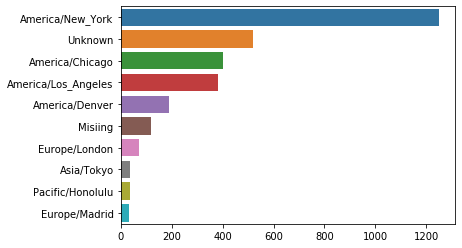

In [120]:
sns.barplot(y=subset.index, x=subset.values)

# seaborn 을 이용해서 barplot 을 그리는데, y 축이 subset 즉 위에서 출력한 인덱스값이고
# x 축은 밸류값이다.

In [121]:
# a 필드에는 URL 단축을 실행하는 브라우저, 단말기, 
# 애플리케이션에 대한 정보 (User Agent 문자열) 가 들어 있다.

In [122]:
frame['a'][1]

# 전체 데이터 중  a 컬럼의 1번째 로우 값을 가져온다.

'GoogleMaps/RochesterNY'

In [123]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [201]:
frame['a'][51][:50]
# 51번 로우의 자료를 50자만 찍어라

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [125]:
# 'agent' 라고 하는 흥미로운 문자열 정보를 분석하는 일이 어려워 보일 수도 있다. 
# 한가지 가능한 전략은 문자열에서 첫 번째 토큰(브라우저의 종류를 어느 정도 알 수 있을 만큼) 을 
# 잘라내서 사용자 행동에 대한 또 다른 개요를 만드는 것이다.

In [193]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
# a 컬럼의 데이터 중 없는 애들은 다 지우고, 한줄씩 뽑아서, spilit 스페이스 공간을 전부 잘라서 
# 맨 첫번째 토큰만 출력해준다.

In [194]:
results[:5]
# 어떤 브라우저 정보에 접속했는지 볼 수 있는 부분, 

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [128]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [129]:
# 이제 표준시간대 순위표를 윈도우 사용자와 비윈도우 사용자 그룹으로 나눠보자.
# 문제를 단순화해서 agent 문자열이 'Windows' 를 포함하면 윈도우 사용자라고 가정하고
# agent 값이 없는 데이터는 다음과 같이 제외한다. 앞의 'a' 칼럼을 뜻한다.

In [130]:
cframe = frame[frame.a.notnull()]
# clean frame 을 만들자는 의미로 a 칼럼에서 nul 은 전부 제외하고 뽑아낸다

In [195]:
import numpy as np

cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                       'Windows', 'Not Windows')
# where 메서드 cframe 에 a 칼럼을 주고 안에서 스트링 중에 Windows 가 있으면 os 라는 리스트를 만들어서
# 있으면 window 없으면 not windows 를 넣는다.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [138]:
cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [140]:
#그런 다음 표준시간대와 운영체제를 기준으로 데이터를 그룹으로 묶는다

In [144]:
by_tz_os = cframe.groupby(['tz', 'os'])
# 위에서 만들어낸 tz 표준시간대와 os 와 그룹핑 해서 데이터를 다시 만든다.

In [145]:
# 앞에서 살펴본 value_count 함수처럼 그룹별 합계는 size 함수로 계산할 수 있다.
# 결과는 unstack 함수를 이용해서 표로 재배치한다.

In [196]:
agg_counts = by_tz_os.size().unstack().fillna(0)

# 만들어놓은 그룹별 사이즈를 구해서(몇개인지 구할것) os 에 들어가 있는 값을 개수만큼 펼쳐서 나타내라
# unstack 뜻은 펼쳐서 나타내라는 뜻.  fillna 데이터 없는건 결측치로 계산해서 0 으로 나태낸다.

In [198]:
agg_counts[:10]

# Series 나 pandas 는 출력값이 인덱스 값으로 나온다.

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [199]:
len(agg_counts)

97

In [ ]:
# 마지막으로 전체 표준시간대의 순위를 모아보자. 먼저 agg_counts
# 인덱스 칼럼 칼럼 의 데이터프레임이 완성됨

# tz 가 인덱스로 있고, os 가 밸류로 있는 시퀀스 데이타

In [148]:
indexer = agg_counts.sum(1).argsort()

# 원래의 데이터를 건드리지 않고, 위에 있는 값을 기준으로 
## Series 나 pandas 는 출력값이 인덱스 값으로 나온다.

# agg_counts 에 

In [149]:
indexer[:10]

# 실제로는 인덱스의 순서대로 되어있음
# 하지만 원래대로 위의 코드값으로 넣으면 출력값이 인덱스 값을 기준으로 나오기 때문에
# A 기준으로 순서가 출력된다.

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [150]:
# agg_counts 에 take 를 사용해서 로우를 정렬된 순서 그대로 선택하고 
# 마지막 10개 로우(가장 큰 값)만 잘라낸다

In [151]:
count_subset = agg_counts.take(indexer[-10:])
# 인덱스 값을 그대로 받아서 찍어줘라 (take)

In [152]:
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [153]:
# pandas 에는 이와 똑같은 동작을 하는 nlargest 라는 메서드가 존재한다.

In [154]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [155]:
# 앞에서 해본 것처럼 plot 함수에 stacked=True 를 넘겨주면 데이터를 중첩막대그래프로 만들 수 있다.

In [156]:
count_subset = count_subset.stack()
# 위에 있는 count_subset 결과물을 밑에 있는 dataFrame 으로 만들어주낟.
# 겹쳐있는 행을 나눠서 열에 넣어준다.
# os 에 있는 컬럼 값을 열에 넣어준다. 대신 tz 는 두번씩 나오게 됨

In [157]:
count_subset.name = 'total'

# .name 은 새로운 컬럼을 만들어줌 ['name'] 과 같은 의미

In [158]:
count_subset = count_subset.reset_index()

# 맨 앞에 인덱스 넘버를 추가해주는 함수

In [160]:
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


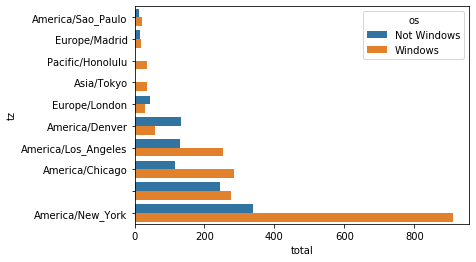

In [162]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [163]:
# 위 그래프로는 작은 그룹에서 윈도우 사용자의 상대 비율을 확인하기 어렵다. 
# 하지만 각 로우에서 총합을 1로 정규화한뒤 그래프를 그리면 쉽게 확인할 수 있다.

In [202]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

# apply 는 . 앞에 있는 값을 인자로 사용할 수 있게 해줌
# group[새로운 컬럼 생성] = apply 앞에 나온 값을 group 에 넣어 계산

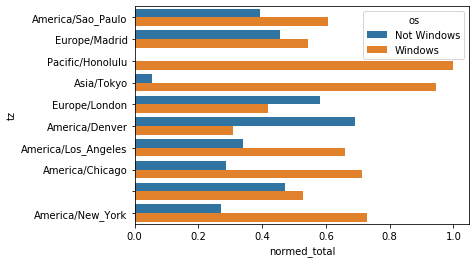

In [172]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [ ]:
# 정규합 계싼을 더 효율적으로 하는 방법

In [169]:
g = count_subset.groupby('tz')

In [170]:
results2 = count_subset.total / g.total.transform('sum')

In [171]:
results2

0     0.393939
1     0.606061
2     0.457143
3     0.542857
4     0.000000
5     1.000000
6     0.054054
7     0.945946
8     0.581081
9     0.418919
10    0.691099
11    0.308901
12    0.340314
13    0.659686
14    0.287500
15    0.712500
16    0.470250
17    0.529750
18    0.270983
19    0.729017
Name: total, dtype: float64